In [0]:
!wget https://public.by.files.1drv.com/y4m8tMgxXE5fA09MgLieUYr8RW2bKqMIQZq2sQqTQ-KFhXo-Lovfy-zAATrX3_BVc36MtV6GCDuqLdc0OBbQb0zESlOTF-qi-dLTspKCGGkiTY9wKkroduI_iebB1BiX6WnKsyRSX2y3UOKKo4N9ldq_COsum-WDw_B-NLY27xs1Q4ComfBU7Yo8_HglHvlYb3H/DMF.zip

--2018-12-26 04:33:23--  https://public.by.files.1drv.com/y4m8tMgxXE5fA09MgLieUYr8RW2bKqMIQZq2sQqTQ-KFhXo-Lovfy-zAATrX3_BVc36MtV6GCDuqLdc0OBbQb0zESlOTF-qi-dLTspKCGGkiTY9wKkroduI_iebB1BiX6WnKsyRSX2y3UOKKo4N9ldq_COsum-WDw_B-NLY27xs1Q4ComfBU7Yo8_HglHvlYb3H/DMF.zip
Resolving public.by.files.1drv.com (public.by.files.1drv.com)... 13.107.42.12
Connecting to public.by.files.1drv.com (public.by.files.1drv.com)|13.107.42.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15629076 (15M) [application/zip]
Saving to: ‘DMF.zip’

DMF.zip             100%[===================>]  14.90M  9.95MB/s    in 1.5s    

2018-12-26 04:33:30 (9.95 MB/s) - ‘DMF.zip’ saved [15629076/15629076]



In [0]:
import zipfile
zip = zipfile.ZipFile('/content/DMF.zip')
zip.extractall()

In [0]:
!ls

ratings.dat  run_model.ipynb  sample_data


In [0]:
from DataSet import DataSet

ModuleNotFoundError: ignored

In [0]:
filepath = 'ratings.dat'
# a = DataSet(filepath)

In [0]:
a.shape[0]

6040

In [0]:
import numpy as np
import pandas as pd


In [3]:
df = pd.DataFrame(a.data, columns=['user', 'item', 'ratings', 'time'])
df = df.drop(columns=['time'])

NameError: ignored

In [9]:
# filename = './Data/ml-1m/u.data'
name = ['user', 'item', 'ratings', 'time']
df1 = pd.read_csv('ratings.dat', sep='::', names = name)
df1 = df1.drop(columns=['time'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [0]:
data_dim = len(df1.user.unique()), len(df1.item.unique())

In [12]:
data_dim[0]

6040

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
data = np.array(df1)
train, test = train_test_split(data, test_size=0.2)

In [0]:
u_train = train[:,0]
i_train = train[:,1]
r_train = train[:,2]
u_test = test[:,0]
i_test = test[:,1]
r_test = test[:,2]

In [0]:
r_train = r_train/5
r_test = r_test/5

In [0]:
shuffled_ratings = df.sample(frac = 1.)
Users = shuffled_ratings['user'].values
print ('Users:', Users, ', shape =', Users.shape)
Movies = shuffled_ratings['item'].values
print ('Movies:', Movies, ', shape =', Movies.shape)
Ratings = shuffled_ratings['ratings'].values
print ('Ratings:', Ratings, ', shape =', Ratings.shape)

Users: [3646 5656 4051 ... 3453  662  659] , shape = (1000209,)
Movies: [2985  213 2797 ... 1294  410 2145] , shape = (1000209,)
Ratings: [4. 5. 2. ... 4. 4. 3.] , shape = (1000209,)


In [16]:
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.layers import dot, concatenate, Embedding, Input, Flatten, Dropout, Dense
from keras.models import Sequential
from keras import optimizers
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [0]:
len_dim_i = [128,256,512]
len_dim_u = [128,256,512]
len_dim_r = [600,300]

In [0]:
user_id_input = Input(shape=[1], name='user')
item_id_input = Input(shape=[1], name='item')

user_embedding = Embedding(output_dim=10, input_dim=data_dim[0] + 1,
                                   input_length=1, name='user_embedding')(user_id_input)
item_embedding = Embedding(output_dim=10, input_dim=data_dim[1] + 1,
                                   input_length=1, name='item_embedding')(item_id_input)

# reshape from shape: (batch_size, input_length, embedding_size)
# to shape: (batch_size, input_length * embedding_size) which is
# equal to shape: (batch_size, embedding_size)

user_vecs = (Dense(300))(user_embedding)
item_vecs = (Dense(300))(item_embedding)
user_vecs = (Dense(600))(user_embedding)
item_vecs = (Dense(600))(item_embedding)
# for i in range(len(len_dim_u)):
#     user_vecs = (Dense(len_dim_u[i], activation="relu"))(user_vecs)
# #     user_vecs = (Dropout(0.1))(user_vecs)
# for i in range(len(len_dim_i)):
#     item_vecs = (Dense(len_dim_i[i], activation="relu"))(item_vecs)
#     item_vecs = (Dropout(0.1))(item_vecs)
user_vecs = Flatten()(user_embedding)
item_vecs = Flatten()(item_embedding)

    
# y = merge([user_vecs, item_vecs], mode='dot', output_shape=(1,))
y = concatenate([user_vecs, item_vecs])
for i in range(len(len_dim_r)):
    y = (Dense(len_dim_r[i], activation="relu"))(y)
    y = (BatchNormalization())(y)
    y = (Dropout(0.2))(y)
# y = Dense(1, activation="relu")(y)
# M = Sequential()
# M.add(y)
# y = (Dropout(0.25))(y)
# y = (Dense(64))(y)
# y = (Dropout(0.2))(y)
# y = (Dense(32))(y)
# y = (Dropout(0.25))(y)
# y = (Dense(16))(y)
# y = (Dropout(0.1))(y)
# y = (Dense(4))(y)
# y = (Dropout(0.2))(y)
y = (Dense(1, activation='relu'))(y)

model = Model(inputs=[user_id_input, item_id_input], outputs=[y])
adam = optimizers.Adam(lr=0.0001)
model.compile(optimizer=adam, loss='mse',metrics=['accuracy'])

In [31]:
history = model.fit([u_train,i_train], r_train,validation_data=([u_test,i_test], r_test), batch_size=512, epochs = 50, verbose=1)

Train on 800167 samples, validate on 200042 samples
Epoch 1/50
800167/800167 [==============================] - 21s 26us/step - loss: 3.4607 - acc: 0.2508 - val_loss: 1.8325 - val_acc: 0.3313
Epoch 2/50
800167/800167 [==============================] - 19s 24us/step - loss: 1.6861 - acc: 0.3305 - val_loss: 1.3429 - val_acc: 0.3644
Epoch 3/50
800167/800167 [==============================] - 19s 24us/step - loss: 1.2978 - acc: 0.3657 - val_loss: 1.1480 - val_acc: 0.3890
Epoch 4/50
800167/800167 [==============================] - 20s 25us/step - loss: 1.1488 - acc: 0.3873 - val_loss: 0.9891 - val_acc: 0.4028
Epoch 5/50
800167/800167 [==============================] - 20s 25us/step - loss: 0.9895 - acc: 0.4024 - val_loss: 0.9469 - val_acc: 0.4095
Epoch 6/50
800167/800167 [==============================] - 20s 25us/step - loss: 0.9464 - acc: 0.4100 - val_loss: 0.9276 - val_acc: 0.4133
Epoch 7/50
800167/800167 [==============================] - 20s 25us/step - loss: 0.9038 - acc: 0.4143 - val

In [32]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 10)        60410       user[0][0]                       
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 10)        37070       item[0][0]                       
__________________________________________________________________________________________________
flatten_9 

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

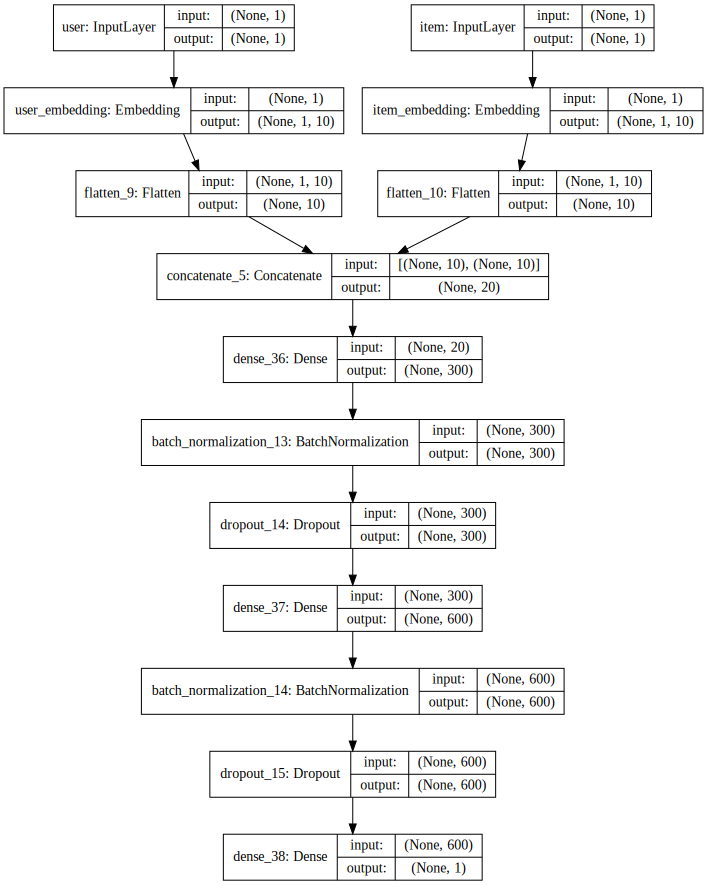

In [33]:
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [0]:
# print(history)

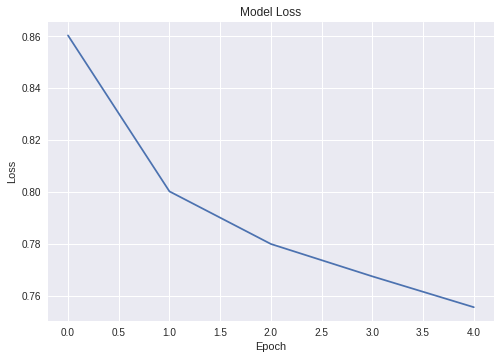

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

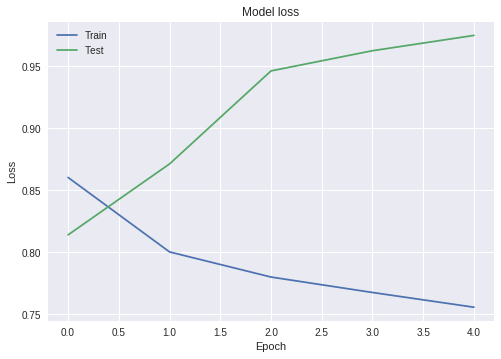

In [0]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

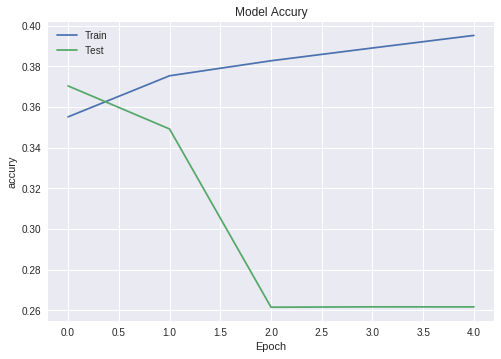

In [0]:
# Plot training & validation loss values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accury')
plt.ylabel('accury')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

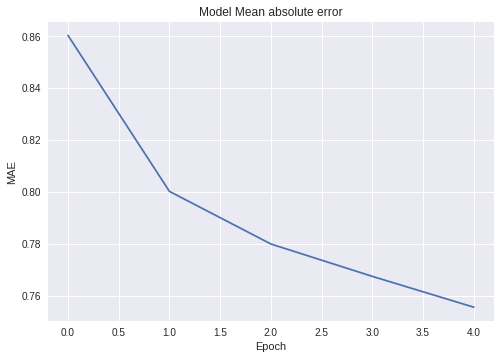

In [0]:
# Plot training & validation loss values
plt.plot(history.history['mean_absolute_error'])
plt.title('Model Mean absolute error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.show()

In [0]:
# history.history['acc']

In [0]:
# user_id_input = Input(shape=[1], name='user')
# item_id_input = Input(shape=[1], name='item')

# user_embedding = Embedding(output_dim=100, input_dim=a.shape[0] + 1,
#                                    input_length=1, name='user_embedding')(user_id_input)
# item_embedding = Embedding(output_dim=100, input_dim=a.shape[1] + 1,
#                                    input_length=1, name='item_embedding')(item_id_input)

# # reshape from shape: (batch_size, input_length, embedding_size)
# # to shape: (batch_size, input_length * embedding_size) which is
# # equal to shape: (batch_size, embedding_size)
# user_vecs = Flatten()(user_embedding)
# item_vecs = Flatten()(item_embedding)

#         # y = merge([user_vecs, item_vecs], mode='dot', output_shape=(1,))
# y = dot([user_vecs, item_vecs], axes=1)

# y = Dense

# model = Model(inputs=[user_id_input, item_id_input], outputs=[y])
# model.compile(optimizer='adam', loss='mae',metrics=['accuracy'])

In [0]:
# history = model.fit([Users,Movies], Ratings, batch_size=32, epochs = 5, verbose=1)

In [0]:
from sklearn.cluster import KMeans
kmeans_1 = KMeans(n_clusters=10, n_init=20, n_jobs=4)
predictions = kmeans_1.fit_predict(filepath)

In [0]:
def encoder()